In [2]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from google.colab import drive
from threading import Thread

#g = nx.erdos_renyi_graph(25, 0.13)
drive.mount('/content/drive')
file = '/content/drive/My Drive/SNA/ia-email-univ.mtx'
g = nx.read_adjlist(file)

if not g.is_directed():
    g = g.to_directed()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#FUNCTION to set probability threashold to each node
def set_activation_probabilities(graph):
  attr={}
  for edge in graph.edges():
    attr.update( {edge : np.random.uniform(0, 0.8)})
                                                 
  nx.set_edge_attributes(graph, attr, 'prob')
  
  return graph

In [0]:
#FUNCTION to set time delay parameter 
def set_time_delay_parameters(graph):
  attr={}
  for edge in graph.edges():
    attr.update( {edge : np.random.exponential(0.1)}) # Draw samples from an exponential distribution with a scale of globalDelay
                                                 
  nx.set_edge_attributes(graph, attr, 'delay')
  
  return graph

In [0]:
# FUNCTION to run the diffusion process in a single node. If succeeds if calls the same function on its successors

def diffusion_process(graph,node,diffusThreshold,delay):

  if(node in visitedNodes):
    return
  visitedNodes.append(node)
  activationProb = np.random.uniform(0.0, 1)
  activation =  activationProb >= diffusThreshold
  if activation: 
    
    time.sleep(delay)              
    activatedNodes.append(node)

    for suc_node in graph.successors(node):
      sucDiffusProb = g[node][suc_node]['prob']
      sucDelayParam = g[node][suc_node]['delay']
      thread = Thread(target=diffusion_process, args=(graph,suc_node,sucDiffusProb,sucDelayParam,))
      thread.start()
      threads.append(thread)



  

In [6]:
#number of nodes
nodes = len(g.nodes())
print("The number of nodes is",nodes)
#number of edges
edges = len(g.edges())
print("The number of edges is", edges)
#max_degree
max_degree=max(dict(g.degree()).items(), key = lambda x : x[1])[1]
print("The maximum degree is:", max_degree)

The number of nodes is 1139
The number of edges is 10913
The maximum degree is: 142


In [7]:
#top five nodes with the highest degree centrality
degree_centrality=nx.degree_centrality(g)
sorted_degree_centrality=sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_degree_centrality_nodes=[i[0] for i in sorted_degree_centrality]
print("The five nodes with the highest degree centrality scores are: ", top_degree_centrality_nodes)

#top five nodes with the highest closeness centrality
closeness_centrality=nx.closeness_centrality(g)
sorted_closeness_centrality=sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness_centrality_nodes=[i[0] for i in sorted_closeness_centrality]
print("The five nodes with the highest closeness centrality scores are: ", top_closeness_centrality_nodes)

#top five nodes with the highest betweenness centrality
betweenness_centrality=nx.betweenness_centrality(g)
sorted_betweenness_centrality=sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness_centrality_nodes=[i[0] for i in sorted_betweenness_centrality]
print("The five nodes with the highest betweenness centrality scores are: ", top_betweenness_centrality_nodes)

The five nodes with the highest degree centrality scores are:  ['105', '333', '16', '23', '42']
The five nodes with the highest closeness centrality scores are:  ['333', '23', '105', '42', '41']
The five nodes with the highest betweenness centrality scores are:  ['333', '105', '23', '578', '76']


In [8]:
#nodes with the highest pagerank
pageranked = nx.pagerank(g, alpha=0.85)
sorted_pageranked = sorted(pageranked.items(), key=lambda x: x[1], reverse=True)[:5]
top_pageranked_nodes = [i[0] for i in sorted_pageranked]
print("The five nodes with the highest PageRank scores are: ", top_pageranked_nodes)
#nodes with the highest hub scores(HITS Algorithm)
hubscore = nx.hits(g)
sorted_hubscore = sorted(hubscore[0].items(), key=lambda x: x[1], reverse=True)[:5]
top_hubscore_nodes = [i[0] for i in sorted_hubscore]
print("The five nodes with the highest hub scores are: ", top_hubscore_nodes)
#nodes with the highest authority scores(HITS Algorithm)
authorityscore = nx.hits(g)
sorted_authorityscore = sorted(authorityscore[1].items(), key=lambda x: x[1], reverse=True)[:5]
top_authorityscore_nodes = [i[0] for i in sorted_authorityscore]
print("The five nodes with the highest authority scores are: ", top_authorityscore_nodes)

The five nodes with the highest PageRank scores are:  ['105', '23', '333', '41', '42']
The five nodes with the highest hub scores are:  ['105', '16', '196', '204', '42']
The five nodes with the highest authority scores are:  ['105', '16', '196', '204', '42']


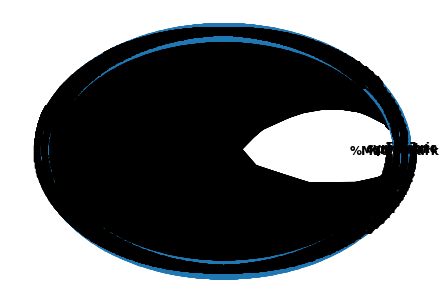

In [20]:
g=set_activation_probabilities(g)
g=set_time_delay_parameters(g)

#nx.draw(g, with_labels=True, font_weight='bold')
nx.draw_shell(g, with_labels=True, font_weight='bold')

globalDelay = 0.1 # Scale to be used in the in the creation of random delays for each node, following the exponetioal distribution
globalProbThreshold = 0.8 
#seedNodes = [ 148, 299,373,410,598] 
seedNodes = top_betweenness_centrality_nodes[:5] 

visitedNodes = list()
activatedNodes = list()
threads = []

startTime = time.time()

for seed in seedNodes:
  thread = Thread(target=diffusion_process, args=(g,seed,0,0,))
  thread.start()
  threads.append(thread)

for t in threads:
     t.join() 

endTime = time.time() 
timePassed = endTime - startTime
diffusPercentage = len(activatedNodes)/len(g.nodes)

In [21]:
'''
print("Activated nodes:")
print(activatedNodes)
print("Visited nodes:")
print(visitedNodes)
'''

print("Time passed for the diffusion to end: ", timePassed)
print("Total number of nodes: ", len(g.nodes))
print("Number of nodes activated:",len(activatedNodes))
print("Percentage of information diffusion in the graph: ", diffusPercentage)



Time passed for the diffusion to end:  1.9411489963531494
Total number of nodes:  1139
Number of nodes activated: 648
Percentage of information diffusion in the graph:  0.568920105355575


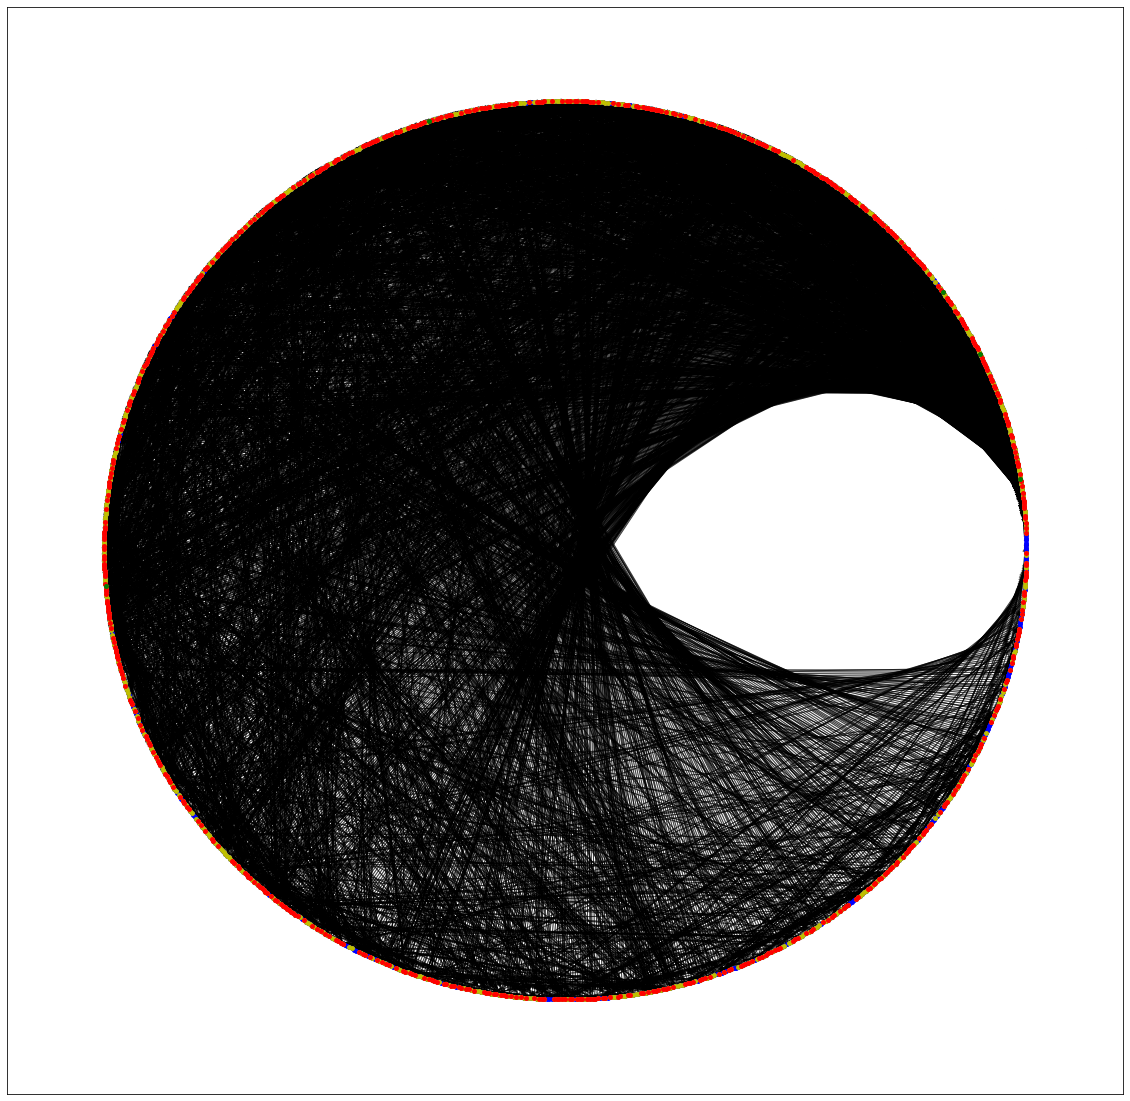

In [41]:

pos=nx.shell_layout(g)

nx.draw_networkx_nodes(g,pos,with_labels=True,nodelist=g.nodes,node_color='b',node_size=15)
nx.draw_networkx_nodes(g,pos,with_labels=True,nodelist=visitedNodes,node_color='y',node_size=15)
nx.draw_networkx_nodes(g,pos,with_labels=True,nodelist=activatedNodes,node_color='r',node_size=15)
nx.draw_networkx_nodes(g,pos,with_labels=True,nodelist=seedNodes,node_color='g',node_size=15)
nx.draw_networkx_edges(g,pos,width=1.0,alpha=0.5)

#plt.figure(figsize=(10, 10)) 
plt.rcParams['figure.figsize'] = [25, 25]

